In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

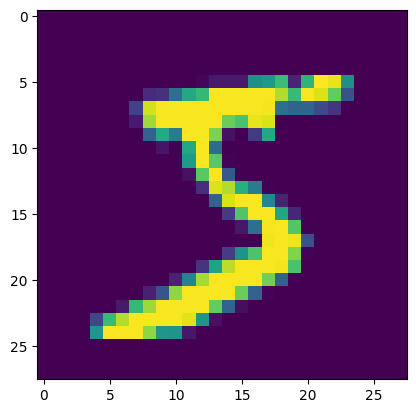

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [8]:
#for value between (0-1)
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
#Applying ANN

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#we used multicalss softmax thats why sparse CCE
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2804 - accuracy: 0.9193 - val_loss: 0.1493 - val_accuracy: 0.9569
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1174 - accuracy: 0.9645 - val_loss: 0.1083 - val_accuracy: 0.9682
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0815 - accuracy: 0.9749 - val_loss: 0.0974 - val_accuracy: 0.9707
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0979 - val_accuracy: 0.9725
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.0992 - val_accuracy: 0.9748
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0405 - accuracy: 0.9870 - val_loss: 0.1006 - val_accuracy: 0.9742
Epoch 7/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.1142 - val_accuracy:

In [17]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
# argmax: to pick the class with the highest probability for three different classes
y_pred = y_prob.argmax(axis=1)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9702

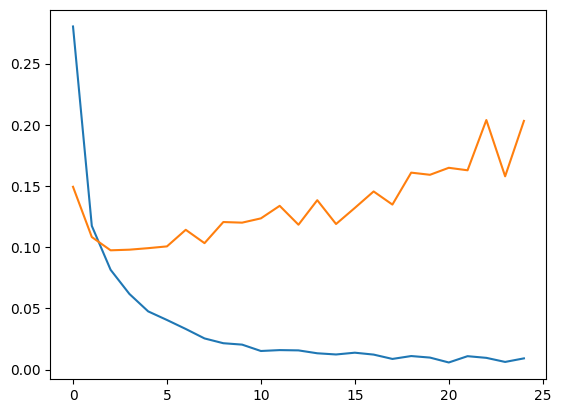

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

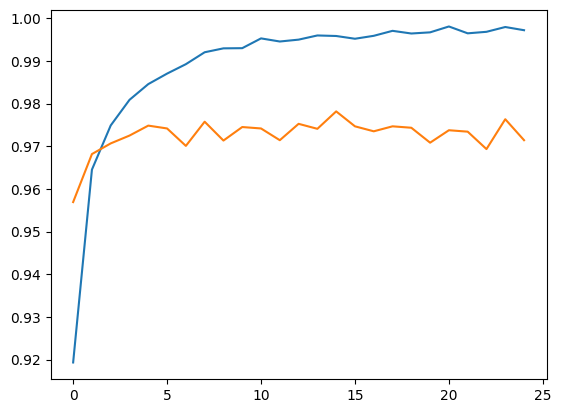

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])